In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

What we did so far:
1. Found missing data in both dataset and training dataset
2. Replaced ambiguous data to its definitions usting provided dictionaries
3. Used train/test split on the main dataset. Logistic regression gave ~99.9% accuracy 
4. Found a useless column veil-type_partial after correlation test
5. Explored the training set. Inserted missing dummy columns with 0 values
6. Predicted class using training data on the best LR model after 10-fold cross validation
7. Challenged PCA on train/test split of the main dataset. Needs more work here

More done
1. Visualize data using pie/bar/hist. That mostly includes features ditributions
2. Chi square test of all features
3. Find most and less usefull features
4. Find which features affect mushrooms to be more likely poisonous/edible

Plans
1. Work on PCA?
2. Do more machine learning algorithms to make a model, show Roc_curve
3. Eat mushrooms (͠≖ ͜ʖ͠≖)

### Explore data

In [2]:
data = pd.read_csv("datasets/dataset_mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info() # list the features and main information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7921 non-null   object
 1   cap-shape                 7921 non-null   object
 2   cap-surface               7921 non-null   object
 3   cap-color                 7921 non-null   object
 4   bruises                   7921 non-null   object
 5   odor                      7921 non-null   object
 6   gill-attachment           7921 non-null   object
 7   gill-spacing              7921 non-null   object
 8   gill-size                 7921 non-null   object
 9   gill-color                7921 non-null   object
 10  stalk-shape               7921 non-null   object
 11  stalk-root                7921 non-null   object
 12  stalk-surface-above-ring  7921 non-null   object
 13  stalk-surface-below-ring  7921 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.isnull().any() 
# check if there is any missing data
# no missing data found
# however, missing data might labeled

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [5]:
for column in data.columns:
    print(column, "\n  ",data[column].unique())

class 
   ['p' 'e']
cap-shape 
   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 
   ['s' 'y' 'f' 'g']
cap-color 
   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 
   ['t' 'f']
odor 
   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 
   ['f' 'a']
gill-spacing 
   ['c' 'w']
gill-size 
   ['n' 'b']
gill-color 
   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 
   ['e' 't']
stalk-root 
   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 
   ['s' 'f' 'k' 'y']
stalk-surface-below-ring 
   ['s' 'f' 'y' 'k']
stalk-color-above-ring 
   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 
   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 
   ['p']
veil-color 
   ['w' 'n' 'o' 'y']
ring-number 
   ['o' 't' 'n']
ring-type 
   ['p' 'e' 'l' 'f' 'n']
spore-print-color 
   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 
   ['s' 'n' 'a' 'v' 'y' 'c']
habitat 
   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


There are some '?' in the set at least in one feature
Let's count how many of the missing there is

In [6]:
for i in range(len(data.columns)):   # 0 to 22
    if ('?' in np.array(data.iloc[:,i])):   # if '?' appears in an c olumn
        print(data.iloc[:,i].value_counts())   # count values in a column and print


b    3687
?    2419
e    1092
c     535
r     188
Name: stalk-root, dtype: int64


2419/7921 or 30.5% of the values in the stalk-root column are written as 'missing'

More research is needed. Most likely '?' means that stalk root is absent. Column will not be dropped until more research is done

## Replace data using column definitions (e.g. 'p' to poisonous)

In [7]:
data_definitions = pd.read_csv("datasets/columns_definitions.csv")
data_definitions

,column_name,defs
0,class,"{""e"": ""edible"", ""p"": ""poisonous""}"
1,cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
2,cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
3,cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
4,bruises,"{""t"": ""bruises"", ""f"": ""no""}"
5,odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
6,gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
7,gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
8,gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"
9,gill-color,"{""k"": ""black"", ""n"": ""brown"", ""b"": ""buff"", ""h"":..."


In [8]:
data_definitions.set_index('column_name') 
# set column_name as index column, for convenience 

,defs
column_name,
class,"{""e"": ""edible"", ""p"": ""poisonous""}"
cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
bruises,"{""t"": ""bruises"", ""f"": ""no""}"
odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"


In [9]:
columns_dictionaries_list = [] # initialize a list which will contain dictionaries

for column_name in data_definitions.index:
    s = data_definitions.loc[column_name]['defs']
    columns_dictionaries_list.append(eval(s))

columns_dictionaries_list[:5]

[{'e': 'edible', 'p': 'poisonous'},
 {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 {'t': 'bruises', 'f': 'no'}]

In [10]:
# check whether column names are the same in both main dataset and columns description dataset

features_data = list(data.columns)
features_data_definitions = list(data_definitions['column_name'])

if (set(features_data)==set(features_data_definitions)):
    print("Same")

Same


Iterate through each column and change values to its description

In [11]:
i = 0
for column_name in features_data:
    data[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Submission dataset analysis

In [13]:
data_submission = pd.read_csv("datasets/submission_mushrooms.csv")
data_submission.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,v,d
1,1,b,s,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,2,x,f,n,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
3,3,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
4,4,f,s,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [14]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                203 non-null    int64 
 1   cap-shape                 203 non-null    object
 2   cap-surface               203 non-null    object
 3   cap-color                 203 non-null    object
 4   bruises                   203 non-null    object
 5   odor                      203 non-null    object
 6   gill-attachment           203 non-null    object
 7   gill-spacing              203 non-null    object
 8   gill-size                 203 non-null    object
 9   gill-color                203 non-null    object
 10  stalk-shape               203 non-null    object
 11  stalk-root                203 non-null    object
 12  stalk-surface-above-ring  203 non-null    object
 13  stalk-surface-below-ring  203 non-null    object
 14  stalk-color-above-ring    

'Unnamed: 0' is useless

In [15]:
# drop useless column

data_submission.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
# check for missing data

data_submission.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

Check for '?' is th dataset

In [17]:
for i in range(len(data_submission.columns)):   # 0 to 21
    if ('?' in np.array(data_submission.iloc[:,i])):   # if '?' appears in an column
        print(data_submission.iloc[:,i].value_counts())   # count values in a column and print
    

b    89
?    61
e    28
c    21
r     4
Name: stalk-root, dtype: int64


61/202 or 30.2% values in the stalk-root column are' missing'. Almost same percentage as in the original data.
Most likely it menas that the root is absent in the mushroom. This column decided to not being dropped from the dataset

Replace values with definitions from the definition list of dictionaries we created earlier

In [18]:
i = 1
for column_name in features_data[1:]: # [1:] -> we don't need 'class' column
    data_submission[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1
    
data_submission.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,scaly,yellow,no,foul,free,close,broad,chocolate,enlarging,...,silky,brown,buff,partial,white,one,large,chocolate,several,woods
1,bell,smooth,yellow,bruises,anise,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,convex,fibrous,brown,bruises,none,free,close,broad,purple,tapering,...,smooth,pink,white,partial,white,one,pendant,brown,solitary,woods
3,knobbed,smooth,brown,no,fishy,free,close,narrow,buff,tapering,...,smooth,white,pink,partial,white,one,evanescent,white,several,paths
4,flat,smooth,red,no,foul,free,close,narrow,buff,tapering,...,silky,white,pink,partial,white,one,evanescent,white,several,woods


In [19]:
# compare output with original data set
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


Convert original dataset into dummy variable, which are mutually exclusive columns of each feature

In [20]:
data_dummies = data.drop(columns=['class'],axis=1).copy()
data_dummies = pd.get_dummies(data_dummies)
data_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import label_binarize

# label_binarize converts 'class' to binary, instead of two dummy variables

data_dummies['class'] = label_binarize(data['class'], classes=['edible','poisonous'])
data_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [22]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']

In [23]:
# ROC curve

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve

# Logistic regression with regular 75/25 split, one try

model = LR()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

print("Accuracy:",accuracy_LR)

Accuracy: 1.0


In [24]:
# KNN

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import auc

x_train, x_test, y_train, y_test = tts(X, Y)
KNN = KNN(n_neighbors = 10)
KNN.fit(x_train,y_train)

y_scores = KNN.predict_proba(x_test)
FPR_KNN, TPR_KNN, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_KNN = auc(FPR_KNN, TPR_KNN)

In [25]:
# ANN

from sklearn.neural_network import MLPClassifier as ANN

x_train, x_test, y_train, y_test = tts(X, Y)
ANN = ANN(alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2,3,3), random_state=1)
ANN.fit(x_train, y_train)

y_scores = ANN.predict_proba(x_test)
FPR_ANN, TPR_ANN, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_ANN = auc(FPR_ANN, TPR_ANN)

In [26]:
# GNB

from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = tts(X, Y)
GNB = GaussianNB()
GNB.fit(x_train, y_train)

y_scores = ANN.predict_proba(x_test)
FPR_GNB, TPR_GNB, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_GNB = auc(FPR_GNB, TPR_GNB)

In [27]:
#QDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train, y_train)

y_scores = QDA.predict_proba(x_test)
FPR_QDA, TPR_QDA, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_QDA = auc(FPR_QDA, TPR_QDA)

C:\Users\willa\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [28]:
# LDA

LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

y_scores = LDA.predict_proba(x_test)
FPR_LDA, TPR_LDA, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_LDA = auc(FPR_LDA, TPR_LDA)

In [29]:
#Support Vector Machines

from sklearn.svm import SVC

SVM = SVC(kernel="rbf", probability=True)
x_train, x_test, y_train, y_test = tts(X, Y)
SVM.fit(x_train, y_train)

y_scores = SVM.predict_proba(x_test)
FPR_SVM, TPR_SVM, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_SVM = auc(FPR_SVM, TPR_SVM)

In [30]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier as DT

model=DT(max_depth=4,criterion="entropy")
x_train, x_test, y_train, y_test = tts(X, Y)
model.fit(x_train,y_train)

y_scores = model.predict_proba(x_test)
FPR_DT, TPR_DT, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_DT = auc(FPR_DT, TPR_DT)

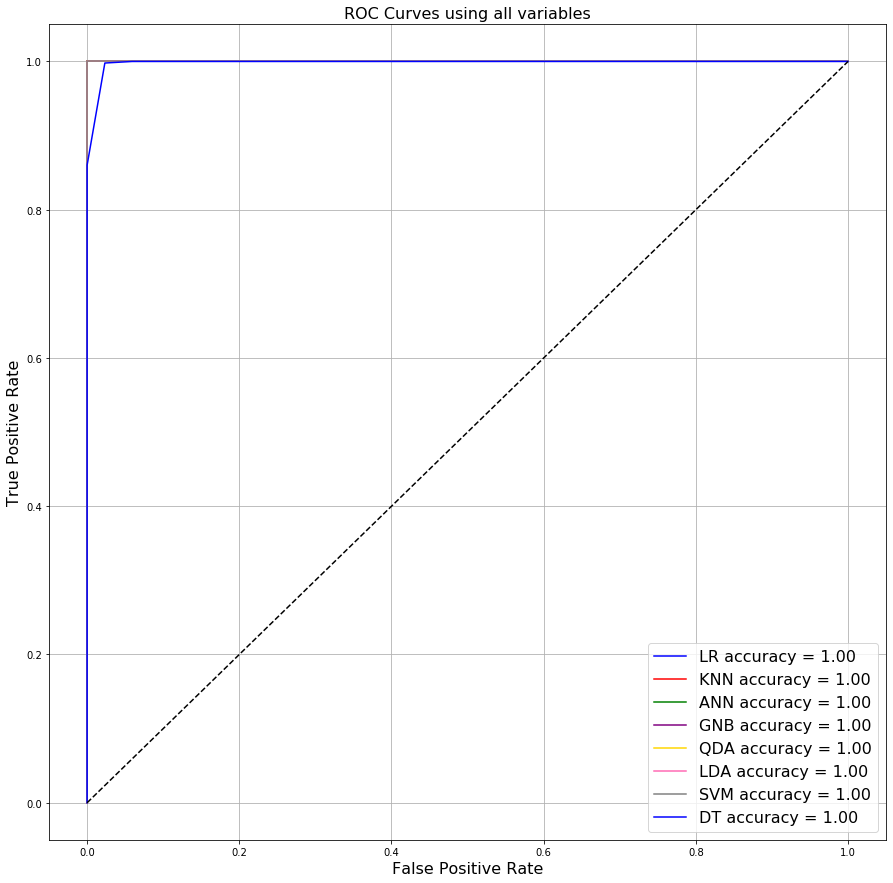

In [31]:
# ROC Curve for various ML algorithms using all variables

plt.plot(FPR_LR, TPR_LR, c="blue", label = 'LR accuracy = %0.2f' % accuracy_LR)
plt.plot(FPR_KNN, TPR_KNN, c="red", label = 'KNN accuracy = %0.2f' % accuracy_KNN)
plt.plot(FPR_ANN, TPR_ANN, c="green", label = 'ANN accuracy = %0.2f' % accuracy_ANN)
plt.plot(FPR_GNB, TPR_GNB, c="purple", label = 'GNB accuracy = %0.2f' % accuracy_GNB)
plt.plot(FPR_QDA, TPR_QDA, c="gold", label = 'QDA accuracy = %0.2f' % accuracy_QDA)
plt.plot(FPR_QDA, TPR_QDA, c="hotpink", label = 'LDA accuracy = %0.2f' % accuracy_LDA)
plt.plot(FPR_SVM, TPR_SVM, c="grey", label = 'SVM accuracy = %0.2f' % accuracy_SVM)
plt.plot(FPR_DT, TPR_DT, c="blue", label = 'DT accuracy = %0.2f' % accuracy_DT)
plt.plot([0,1],[0,1],c="k",ls="--")
plt.legend(loc = 'lower right', fontsize=16)
plt.grid()
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curves using all variables", fontsize=16)
plt.gcf().set_size_inches(15,15)

In [32]:
# Accuracy Boxplot for various ML algorithms using all variables

from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT

def evaluate_model(X, Y, method, repeats):
    accs=[]
    for repeat in range(repeats):
        x_train, x_test, y_train, y_test = tts(X, Y)
        method.fit(X,Y)
        y_predict = method.predict(x_test)
        accs.append(accuracy_score(y_test, y_predict))
    return(accs)

#LR
LRSTATS = evaluate_model(X, Y, LR(), 500)

#ANN
simon = ANN(alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2,3,3), random_state=1)
ANNSTATS = evaluate_model(X, Y, simon, 40)

# Gaussian
GNB = GaussianNB()
GNBSTATS = evaluate_model(X, Y, GNB, 500)

#KNN
KNN = KNN(n_neighbors = 3)
KNNSTATS = evaluate_model(X, Y, KNN, 500)

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDASTATS = evaluate_model(X, Y, LDA, 500)

# Support Vector Machines
SVM = SVC(kernel="rbf", probability=True)
SVMSTATS = evaluate_model(X, Y, SVM, 500)

#DT
DT=DT(max_depth=4,criterion="entropy")
DTSTATS = evaluate_model(X, Y, DT, 500)

sns.boxplot(data=[LRSTATS,ANNSTATS,GNBSTATS,KNNSTATS, LDASTATS, SVMSTATS, DTSTATS])

plt.xticks([0,1,2,3,4,5,6],["LR","ANN","GNB","KNN","LDA", "SVM", "DT"])
plt.title("Accuracy of models using all variables", fontsize=16)
plt.gcf().set_size_inches(15,10)
plt.show()

KeyboardInterrupt: 

In [33]:
# covert string to numbers in dataset

from sklearn.preprocessing import LabelEncoder

data_copy = data.copy()
labelencoder = LabelEncoder()
for column in data_copy.columns:
    data_copy[column] = labelencoder.fit_transform(data_copy[column])
data_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [34]:
data_copy.info() # see the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     7921 non-null   int32
 1   cap-shape                 7921 non-null   int32
 2   cap-surface               7921 non-null   int32
 3   cap-color                 7921 non-null   int32
 4   bruises                   7921 non-null   int32
 5   odor                      7921 non-null   int32
 6   gill-attachment           7921 non-null   int32
 7   gill-spacing              7921 non-null   int32
 8   gill-size                 7921 non-null   int32
 9   gill-color                7921 non-null   int32
 10  stalk-shape               7921 non-null   int32
 11  stalk-root                7921 non-null   int32
 12  stalk-surface-above-ring  7921 non-null   int32
 13  stalk-surface-below-ring  7921 non-null   int32
 14  stalk-color-above-ring    7921 non-null 

#### Correlation heatmap

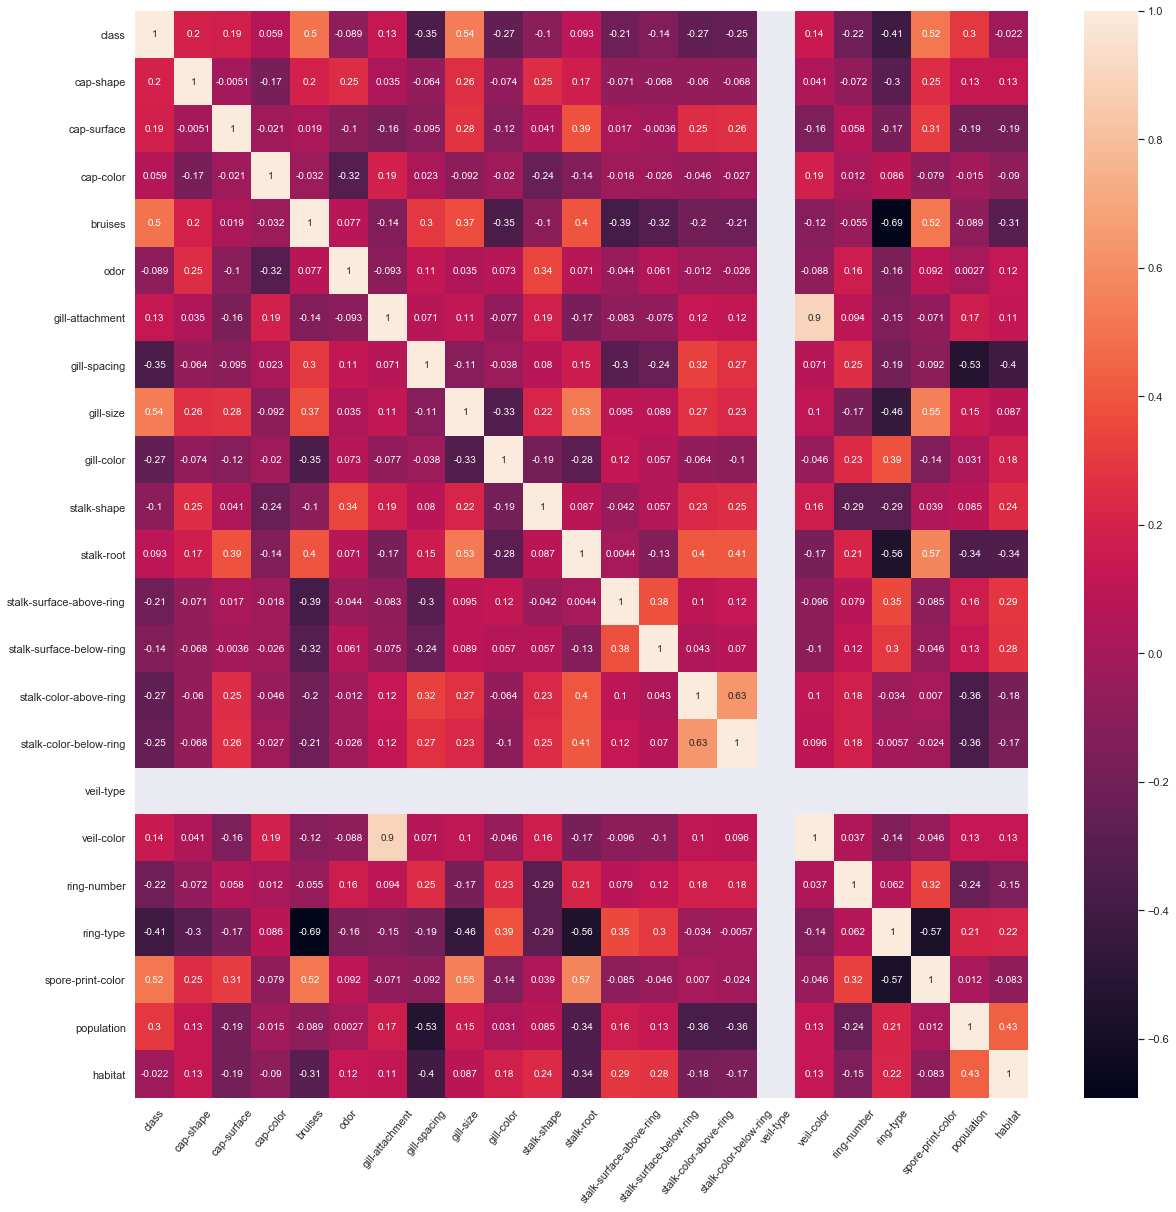

In [36]:
p = sns.heatmap(data_copy.corr(), annot=True,annot_kws={'size':10})
sns.set(rc={'figure.figsize':(20,20)})
p.set_xticklabels(rotation = 50,labels = list(data_copy.columns))
plt.show()

We can notice a useless feature 'veil-type' that has only one value in a whole column

In [ ]:
# dummy data is too big to observe in Jupyter, it needs to be analyzed in an Excel file

data_corr = data_dummies.corr(method="pearson").copy() 
#data_corr.to_excel("output.xlsx")  # comment out - don't overwrite the changed file

In [ ]:
# remove useless feature "veil-type" from the main dataset, dummy variables dataset, and training dataset

data.drop(columns=['veil-type'],axis=1,inplace=True)
data_copy.drop(columns=['veil-type'],axis=1,inplace=True)
data_dummies.drop(columns=['veil-type_partial'],axis=1,inplace=True)
data_submission.drop(columns=['veil-type'],axis=1,inplace=True)

In [ ]:
data_submission_dummies = data_submission.copy()
data_submission_dummies = pd.get_dummies(data_submission_dummies)
data_submission_dummies.head()

In [ ]:
# check the difference in columns

features_data1 = list(data_submission_dummies.columns)
features_data2 = list(data_dummies.columns)
if(set(features_data1)==set(features_data2)):
    print("Same")
else: print("Not same")

In [ ]:
data_dummies.shape

In [ ]:
data_submission_dummies.shape

#### Try to predict class from submission dataset using logistic regression and after dropping the columns
#### Try to reduce data using PCA

In [ ]:

dropped_data = data_dummies.drop(columns=['cap-color_purple', 
                                       'stalk-color-below-ring_cinnamon', 
                                       'odor_musty', 'spore-print-color_yellow', 
                                       'stalk-color-above-ring_cinnamon', 
                                       'ring-number_none', 
                                       'ring-type_none', 
                                       'cap-shape_sunken'],axis=1)

In [ ]:
X = dropped_data.drop(columns=['class'],axis=1)
Y = dropped_data['class']
X.shape,data_submission_dummies.shape

In [ ]:
features_data1 = list(data_submission_dummies.columns)
features_data2 = list(dropped_data.drop(columns=['class'],axis=1).columns)
if(set(features_data1)==set(features_data2)):
    print("Same")
else: print("Not same")

Now the main dataset and te submission dataset are have same fatures

In [ ]:
X = np.array(X)

In [ ]:
# 1 run test/train split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts, KFold

model = LogisticRegression()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train)
class_col = model.predict(data_submission_dummies)

class_col#.reshape(-1,1)

In [ ]:
# 10-fold 

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
accuracy_kfold_list

In [ ]:
# predict class using the best model (actually all models where almost same with ~99.9 % accuracy)

class_col_kfold = model.predict(data_submission_dummies)
    
print(class_col_kfold)

In [ ]:
class_col_kfold=['poisonous' if x==1 else 'edible' for x in class_col_kfold]
class_col_kfold[:10]

In [ ]:
data_submission_dummies.insert(loc=0, column='class_predicted', value=class_col_kfold)
data_submission_dummies[:10]

In [ ]:
# PCA try

from sklearn import preprocessing as p
from sklearn.decomposition import PCA

accuracy_pca_list = []
for i in range(1,6):
    
    x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])

    st = p.StandardScaler().fit(x_train)
    new = st.transform(x_train)
    pca = PCA(n_components=i).fit(new)
    x_train = pca.transform(new)
    x_test = pca.transform(x_test)

    LR = LogisticRegression() 
    LR.fit(x_train, y_train) # Train

    y_pred = LR.predict(x_test)

    accuracy_pca = accuracy_score(y_test, y_pred)
    accuracy_pca_list.append(accuracy_pca)
    
accuracy_pca_list

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(np.arange(1,6), accuracy_pca_list) 
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

#### Try the same, but this time we add missing columns to data_submission_dummies by setting values to 0s, instead of dropping those columns from the main dataset

In [ ]:
# data_dummies has columns that data_submission_dummies does not have

print(len(data_dummies.columns))
missing_cols = set(list(data_dummies.columns))-set(list(data_submission_dummies.columns)) - {'class'}
missing_cols
# ignore class

In [ ]:
for i in missing_cols:
    print(data_dummies.columns.get_loc(i),i)

In [ ]:
data_subm_dumm_raised = data_submission_dummies.copy()

In [ ]:
# add missing columns into the data_submission_dummies and set values to 0s
j=0
for i in missing_cols:
    data_subm_dumm_raised.insert(data_dummies.columns.get_loc(i), i, 0, True)
    
data_subm_dumm_raised.shape

In [ ]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']
X.shape, data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1).shape  # check number of columns

In [ ]:
# run 10-fold again

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    y_pred = LR.fit(x_train, y_train).predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
class_col_kfold = model.predict(data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1))

print("Accuracies in 10-forld CV\n",[round(num, 6) for num in accuracy_kfold_list])
print("\n\nClass prediction\n",class_col_kfold)

#data_sub = data_subm_dumm_raised.copy() # change the name. not the best dataframe name

In [ ]:
# update class_predicted column (although it is >99% chance that it did not change)

class_col_kfold=['Poisonous' if x==1 else 'Edible' for x in class_col_kfold]
data_subm_dumm_raised['class_predicted'] = class_col_kfold
data_subm_dumm_raised[:5]

In [ ]:
class_predicted = data_subm_dumm_raised['class_predicted'].value_counts()
print(class_predicted)

Distribution of the predicted class in the submission data

In [ ]:
plt.pie(class_predicted, 
        labels=['Edible', 'Poisonous'], 
        startangle=90, 
        autopct='%1.2f%%',
        textprops={'fontsize': 14})
plt.title("Mushroom Class Distribution")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

## Data exploration

Now show the distribution of poisonous/edible in the main dataset

In [ ]:
data.head()

In [ ]:
plt.pie(data['class'].value_counts(), 
        labels=['edible', 'poisonous'], 
        startangle=90, 
        autopct='%1.2f%%',
        textprops={'fontsize': 14})
plt.title("Mushroom Class Distribution In The Main Dataset")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Cap-color and Gill-color have the most number of value: 10 and 12

#### Cap color

In [ ]:
sns.factorplot('class', col='cap-color', data=data[['class', 'cap-color']], kind='count', aspect=.4)
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

Buff color is very interesting, it is always pousonous!

In [ ]:
# cap-color distribution dataframe

cap_color_distr = pd.DataFrame(data.groupby(['cap-color','class']).size(), columns=["Total"])

In [ ]:
edible_capcolor_counts = cap_color_distr.xs('edible', level='class')
pois_capcolor_counts = cap_color_distr.xs('poisonous', level='class')

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''
labels = np.array(edible_capcolor_counts.index)
sizes = np.array(edible_capcolor_counts).transpose()
colors = ['sienna','tan','brown','dimgray','green','pink','purple','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

labels1 = np.array(pois_capcolor_counts.index)
sizes1 = np.array(pois_capcolor_counts).transpose()
colors1 = ['sienna','tan','brown','dimgray', 'pink','red','gainsboro','gold']
explode1 = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.subplot(121)
plt.title('Edible Mushroom Cap Colors', weight='bold', size=20)
plt.pie(sizes, explode=explode, colors=colors, autopct=my_autopct,textprops={'fontsize': 14}, pctdistance=1.13, startangle=90)
plt.gcf().set_size_inches(20,20)
plt.legend(labels, bbox_to_anchor=(0.02,0.5), loc="center left", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.subplot(122)
plt.title('Poisonous Mushroom Cap Colors', weight='bold', size=20)
plt.pie(sizes1, explode=explode1, colors=colors1, autopct=my_autopct,textprops={'fontsize': 14}, pctdistance=1.13, startangle=90)
plt.gcf().set_size_inches(20,20)
plt.legend(labels1, bbox_to_anchor=(1.02,0.5), loc="center right", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

#### Gill color

In [ ]:
# cap-color distribution dataframe
gill_color_distr = pd.DataFrame(data.groupby(['gill-color','class']).size(), columns=["Total"])

In [ ]:
sns.factorplot('class', col='gill-color', data=data[['class', 'gill-color']], kind='count', aspect=.4)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.show()

In [ ]:
edible_gillcolor_counts = gill_color_distr.xs('edible', level='class')
pois_gillcolor_counts = gill_color_distr.xs('poisonous', level='class')

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 2 else ''
labels = np.array(edible_gillcolor_counts.index)
sizes = np.array(edible_gillcolor_counts).transpose()
colors = ['black','sienna','saddlebrown','dimgray','orange','pink','purple','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

labels1 = np.array(pois_gillcolor_counts.index)
sizes1 = np.array(pois_gillcolor_counts).transpose()
colors1 = ['black','sienna','tan','saddlebrown','dimgray', 'green','pink','purple','gainsboro','gold']
explode1 = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.subplot(121)
plt.title('Edible Mushroom Gill Colors', weight='bold', size=20)
plt.pie(sizes, colors=colors, autopct=my_autopct,textprops={'fontsize': 14}, pctdistance=1.13, startangle=90)
plt.gcf().set_size_inches(20,20)
plt.legend(labels, bbox_to_anchor=(0.0,0.5), loc="center left", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.subplot(122)
plt.title('Poisonous Mushroom Gill Colors', weight='bold', size=20)
plt.pie(sizes1, colors=colors1, autopct=my_autopct,textprops={'fontsize': 14}, pctdistance=1.13, explode=explode,
        startangle=90)
plt.gcf().set_size_inches(20,20)
plt.legend(labels1, bbox_to_anchor=(1.02,0.5), loc="center right", fontsize=20, 
          bbox_transform=plt.gcf().transFigure)

plt.show()

In [ ]:
sizes

#### Habitat

In [ ]:
data_var = data[['class', 'habitat']].copy()
sns.factorplot('class', col='habitat', data=data_var, kind='count', aspect=.4)
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

In [ ]:
pd.DataFrame(data_dummies.corr()['class'].sort_values())

In [ ]:
class_habitat = data.groupby(['class','habitat'])['habitat'].size().reset_index(name='count')
edible_habitat_counts = class_habitat.iloc[:7, :]
poisonous_habitat_counts = class_habitat.iloc[7:,  :]
edible_habitat_counts

In [ ]:
poisonous_habitat_counts

In [ ]:
count = edible_habitat_counts['count']
labels = edible_habitat_counts['habitat']
colors = ['lime','g','y','grey','b','crimson','saddlebrown']

plt.subplot(121)
plt.pie(count,
       colors = colors,
       startangle=2,
       autopct='%1.2f%%',
       textprops={'fontsize':20})
plt.title('Edible Mushroom Habitat Percentages', weight='bold', size=20)
plt.legend(labels, bbox_to_anchor=(-0.1,0.5), loc="center left", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

count1 = poisonous_habitat_counts['count']
label1 = poisonous_habitat_counts['habitat']
colorsp = ['lime','g','y','grey','b','saddlebrown']
plt.subplot(122)
plt.pie(count1,
       colors = colorsp,
       startangle=50,
       autopct='%1.2f%%',
       textprops={'fontsize':20})
plt.title('Poisonous Mushroom Habitat Percentages', weight='bold', size=20)
plt.legend(label1, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

plt.show()

#### After finding chi2 scores in Chi Square section, it is interesting that Odor has the highest chi square score. Let's analyse it here

In [ ]:
class_odor = data.groupby(['class','odor'])['odor'].size().reset_index(name='count')
edible_odor_counts = class_odor.iloc[:3, :]
poisonous_odor_counts = class_odor.iloc[ 3:,  :]
class_odor

In [ ]:
poisonous_habitat_counts

In [ ]:
count_odor = poisonous_odor_counts['count']
label = poisonous_odor_counts['odor']
colors = ['yellow','cyan','y','grey','snow','violet','maroon']
plt.subplot(121)
plt.pie(count_odor,
       colors = colors,
       startangle=75,
       autopct='%1.2f%%',
       textprops={'fontsize':15})
plt.title('Poisonous Mushroom Odor Percentages', weight='bold', size=20)
plt.legend(label, bbox_to_anchor=(-0.1,0.5), loc="center left", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)


count = edible_odor_counts['count']
label = edible_odor_counts['odor']
colors = ['lime','g','aliceblue']
plt.subplot(122)
plt.pie(count_odor,
       colors = colors,
       startangle=75,
       autopct='%1.2f%%',
       textprops={'fontsize':15})
plt.title('Edible Mushroom Odor Percentages', weight='bold', size=20)
plt.legend(label, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

plt.show()

In [ ]:
# this cell appers twice

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

# Chi Square   =================================================

In [ ]:
# add class dummy variables

data_copy['class_edible']=[1 if x==0 else 0 for x in data_copy['class']]
data_copy['class_poisonous']=data_copy['class']

In [ ]:
import scipy.stats as stats

data_for_chi2 = data.drop(columns=['class'],axis=1)
p_values = []
chi2_scores = []

for column in data_for_chi2:
    nl = "\n"
    crosstab = pd.crosstab(data['class'], data_for_chi2[column])
    #print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    #print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    p_values.append(p)
    chi2_scores.append(chi2)
chi2_scores[:5]

In [ ]:
# table of p-values

features = data_for_chi2.columns.tolist()
feature_pvalues = pd.DataFrame({'feature' : features,
                                'p-values' : p_values}, 
                                columns=['feature','p-values'])
feature_pvalues

In [ ]:
# sorted table of p-values

feature_pvalues = feature_pvalues.sort_values('p-values',ascending=True)
feature_pvalues

In [ ]:
columns = list(data.drop(columns=['class'],axis=1).columns)
columns[:5]

In [ ]:
norm = plt.Normalize(min(chi2_scores), max(chi2_scores))
colors = plt.cm.copper_r(norm(chi2_scores)) 

fig, ax = plt.subplots()
ax.barh([i for i in range(len(chi2_scores))], chi2_scores, color=colors)
plt.gcf().set_size_inches(15, 9)
plt.yticks(range(0,22),columns)
plt.title('Chi-square')
plt.show()

In [ ]:
chi_dict = dict(zip(columns,chi2_scores)) 
chi_dict

In [ ]:
sorted_chi_dict = dict(sorted(chi_dict.items(), key=lambda item: item[1],reverse=True))
sorted_chi_dict

In [ ]:
sorted_chi_dict.keys()

In [ ]:
s=list(sorted_chi_dict.values())
print(s)

In [ ]:
norm = plt.Normalize(min(list(sorted_chi_dict.values())), max(list(sorted_chi_dict.values())))
colors = plt.cm.copper_r(norm(list(sorted_chi_dict.values()))) 

fig, ax = plt.subplots()
ax.barh([i for i in range(len(sorted_chi_dict))], sorted_chi_dict.values(),color=colors)
plt.gcf().set_size_inches(15, 9)
plt.yticks(range(0,22),sorted_chi_dict.keys())
plt.title('Chi-square')
plt.show()

In [ ]:
keys = list(sorted_chi_dict.keys())[0:5]
values = list(sorted_chi_dict.values())[0:5]
print(keys)
print(values)

In [ ]:
plt.figure()
plt.barh([i for i in range(5)], values)
plt.gcf().set_size_inches(14, 9)
plt.yticks(range(0,5),keys)
plt.title('Chi-square')
plt.show()

In [ ]:
top5_features = keys

In [ ]:
top5_data = data[['odor',
 'spore-print-color',
 'gill-color']]

top5_dummies = pd.get_dummies(top5_data)

In [ ]:
X=np.array(top5_dummies)
Y=dropped_data['class']

In [ ]:
# 10-fold 

kfold = KFold(n_splits=100, shuffle=True)

accuracy_kfold_list = []
#prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = Y[train_idx]
    y_test = Y[test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    #if(accuracy_kfold > prev_acc): # pick the best model
        #prev_acc = accuracy_kfold
        #model=LR

In [ ]:
plt.boxplot(accuracy_kfold_list)
plt.xlabel("Top 5 fatures accuracy 10-fold CV")
plt.gcf().set_size_inches(10,10)
plt.show()

In [ ]:
import math
from collections import Counter


def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:
theilu = pd.DataFrame(index=['class'],columns=data.columns)
columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['class'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

Chi2 test on bar actually showed the same result before

In [ ]:
chi2_scores.reverse()
norm = plt.Normalize(min(chi2_scores), max(chi2_scores))
colors = plt.cm.copper_r(norm(chi2_scores)) 

plt.bar([i for i in range(len(chi2_scores))], norm(chi2_scores),color=colors)
plt.gcf().set_size_inches(10,7)
plt.xticks(range(0,22),columns,rotation=90)
plt.title('Chi-square')
plt.show()

As previously, we got the same top 5  features

In [ ]:
top5_features

# Bar plots

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='spore-print-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='gill-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='ring-type',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='stalk-surface-above-ring',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 15
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+5))
plt.show()

# WEDNESDAY 8.12.2020